In [1]:
import pandas as pd
import sys
import pickle
import csv
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [3]:
person_list = data_dict.keys()
print person_list

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [4]:
features_list = data_dict[person_list[0]].keys()
print features_list

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


###Exploratory Analysis
1. Univariate Analysis

In [20]:
data_df = pd.DataFrame(data_dict).transpose()

In [21]:
display(data_df)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


Since we do not need the email-address field for classification, we can drop it, as it is unique for each individual user (and in some cases contain NaN)

In [22]:
del data_df['email_address']

In [23]:
data_df.isnull().sum()

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
poi                          0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
dtype: int64

We can see clearly that there exists NaN values, but they are considered as String 'NaN' instead of NaN. So we replace all NaN values with numpy's NaN

In [24]:
data_df=data_df.replace('NaN',np.nan)

In [25]:
data_df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [26]:
data_df.isnull().sum()/146.0*100

bonus                        43.835616
deferral_payments            73.287671
deferred_income              66.438356
director_fees                88.356164
exercised_stock_options      30.136986
expenses                     34.931507
from_messages                41.095890
from_poi_to_this_person      41.095890
from_this_person_to_poi      41.095890
loan_advances                97.260274
long_term_incentive          54.794521
other                        36.301370
poi                           0.000000
restricted_stock             24.657534
restricted_stock_deferred    87.671233
salary                       34.931507
shared_receipt_with_poi      41.095890
to_messages                  41.095890
total_payments               14.383562
total_stock_value            13.698630
dtype: float64

In [27]:
poi_df = pd.DataFrame(data_df[data_df.poi==1])
notpoi_df = pd.DataFrame(data_df[data_df.poi==0])
del poi_df['poi']
del notpoi_df['poi']

In [28]:
notpoi_per = notpoi_df.isnull().sum()/128*100
poi_per= poi_df.isnull().sum()/18*100
nan_comp_df = pd.concat([notpoi_per,poi_per],axis=1)
nan_comp_df.columns = ['Not POI','POI']
display(nan_comp_df)

,Not POI,POI
bonus,48.43750,11.111111
deferral_payments,73.43750,72.222222
deferred_income,70.31250,38.888889
director_fees,86.71875,100.000000
exercised_stock_options,29.68750,33.333333
expenses,39.84375,0.000000
from_messages,43.75000,22.222222
from_poi_to_this_person,43.75000,22.222222
from_this_person_to_poi,43.75000,22.222222
loan_advances,97.65625,94.444444


In [29]:
to_delete = nan_comp_df[(nan_comp_df>70.0).any(axis=1)].index.tolist()
print to_delete

['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances', 'restricted_stock_deferred']


In [30]:
data_df.drop(to_delete, axis=1, inplace=True)

In [31]:
initial_nan = data_df.isnull().sum()
print initial_nan

bonus                      64
exercised_stock_options    44
expenses                   51
from_messages              60
from_poi_to_this_person    60
from_this_person_to_poi    60
long_term_incentive        80
other                      53
poi                         0
restricted_stock           36
salary                     51
shared_receipt_with_poi    60
to_messages                60
total_payments             21
total_stock_value          20
dtype: int64


Next we find rows with NaN in more than 75% rows

In [32]:
current_features = data_df.columns
total_features = len(current_features)*1.0
nan_rows = np.asarray(data_df.isnull().sum(axis=1).tolist())/total_features*100

In [33]:
drop_rows = nan_rows>70
print "No. of rows with more than 70% NaN values (i.e. have more than 10 columns empty) are ",drop_rows.sum()


No. of rows with more than 70% NaN values (i.e. have more than 10 columns empty) are  26


In [34]:
#Before removing the row we check if any of these rows have POI = 1 , i.e. they actually are Persons of Interest
data_df[drop_rows][data_df['poi']==1]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


Since None of these rows are POI, we can delete them as these will not further lead to any class imbalance

In [35]:
copy=data_df.copy()
print data_df.iloc[143]

bonus                         NaN
exercised_stock_options    139130
expenses                      NaN
from_messages                 NaN
from_poi_to_this_person       NaN
from_this_person_to_poi       NaN
long_term_incentive           NaN
other                         NaN
poi                         False
restricted_stock              NaN
salary                        NaN
shared_receipt_with_poi       NaN
to_messages                   NaN
total_payments                NaN
total_stock_value          139130
Name: WROBEL BRUCE, dtype: object


In [36]:
data_df=data_df.drop(data_df.index[drop_rows.nonzero()])

In [37]:
display(data_df)

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,1729541.0,13868.0,2195.0,47.0,65.0,304805.0,152.0,False,126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,4046157.0,56301.0,29.0,39.0,0.0,NaN,864523.0,False,1757552.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,6680544.0,11200.0,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,NaN,129142.0,NaN,NaN,NaN,NaN,69.0,False,145796.0,239671.0,NaN,NaN,827696.0,63014.0
BAZELIDES PHILIP J,NaN,1599641.0,NaN,NaN,NaN,NaN,93750.0,874.0,False,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BECK SALLY W,700000.0,NaN,37172.0,4343.0,144.0,386.0,NaN,566.0,False,126027.0,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,953136.0,17355.0,484.0,228.0,108.0,NaN,210698.0,True,157569.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
BERBERIAN DAVID,NaN,1624396.0,11892.0,NaN,NaN,NaN,NaN,NaN,False,869220.0,216582.0,NaN,NaN,228474.0,2493616.0
BERGSIEKER RICHARD P,250000.0,NaN,59175.0,59.0,4.0,0.0,180250.0,427316.0,False,659249.0,187922.0,233.0,383.0,618850.0,659249.0


After remove the rows and columns we can se below that the overnall count of NaN's has decreased conisdderably for each column . The percentage of NaN values reduced for each columns are as follows : 

In [38]:
100-(data_df.isnull().sum()*1.0)/initial_nan*100

bonus                      40.625000
exercised_stock_options    34.090909
expenses                   37.254902
from_messages              43.333333
from_poi_to_this_person    43.333333
from_this_person_to_poi    43.333333
long_term_incentive        32.500000
other                      45.283019
poi                              NaN
restricted_stock           52.777778
salary                     50.980392
shared_receipt_with_poi    43.333333
to_messages                43.333333
total_payments             47.619048
total_stock_value          65.000000
dtype: float64

In [24]:
data_df['bonus']

ALLEN PHILLIP K                 4175000.0
BADUM JAMES P                         NaN
BANNANTINE JAMES M                    NaN
BAXTER JOHN C                   1200000.0
BAY FRANKLIN R                   400000.0
BAZELIDES PHILIP J                    NaN
BECK SALLY W                     700000.0
BELDEN TIMOTHY N                5249999.0
BERBERIAN DAVID                       NaN
BERGSIEKER RICHARD P             250000.0
BHATNAGAR SANJAY                      NaN
BIBI PHILIPPE A                 1000000.0
BLACHMAN JEREMY M                850000.0
BOWEN JR RAYMOND M              1350000.0
BROWN MICHAEL                         NaN
BUCHANAN HAROLD G                500000.0
BUTTS ROBERT H                   750000.0
BUY RICHARD B                    900000.0
CALGER CHRISTOPHER F            1250000.0
CARTER REBECCA C                 300000.0
CAUSEY RICHARD A                1000000.0
COLWELL WESLEY                  1200000.0
CORDES WILLIAM R                      NaN
COX DAVID                        8

In [39]:
def plot_scatter(col1,col2):
    col1_df = data_df[col1]
    col2_df = data_df[col2]
    plt.scatter(col1_df,col2_df)
    plt.xlabel(col1)
    plt.ylabel(col2)
    title = 'Scatter plot for '+col1+' vs. '+col2
    plt.title(title)
    plt.scatter(data_df[col1], data_df[col2])
    #plt.legend(loc='lower right')
    plt.show() 

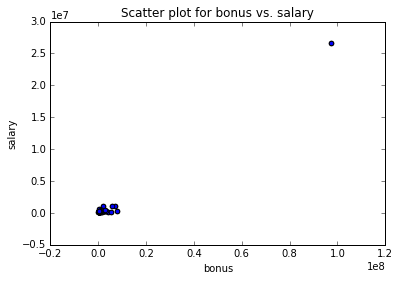

In [40]:
plot_scatter('bonus','salary')

In [41]:
data_df.salary.argmax()

'TOTAL'

In [42]:
data_df.drop('TOTAL',inplace=True)

### Imputing Missing Values.  
Now next thing we do is impute the missing values . First we divide the features into three sets :   
1. Financial Features
2. Email features
3. Target Label

In [43]:
all_features = list(data_df.columns.values)
email_features = ['from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi','to_messages']
target =['poi']
financial_features = [item for item in all_features if item not in email_features and item not in target ]
print financial_features

['bonus', 'exercised_stock_options', 'expenses', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'total_payments', 'total_stock_value']


For Financial features, we will be replacing the missing values with the mean .

In [44]:
financial_df = data_df[financial_features].copy()
financial_df.fillna(financial_df.mean(),inplace=True)

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05


For email_features, we will be replacing the missing values with 0 

In [45]:
email_df = data_df[email_features].copy()
email_df.fillna(email_df.mean(),inplace=True)

,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,2195.000000,47.000000,65.000000,1407.000000,2902.000000
BADUM JAMES P,608.790698,64.895349,41.232558,1176.465116,2073.860465
BANNANTINE JAMES M,29.000000,39.000000,0.000000,465.000000,566.000000
BAXTER JOHN C,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAY FRANKLIN R,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAZELIDES PHILIP J,608.790698,64.895349,41.232558,1176.465116,2073.860465
BECK SALLY W,4343.000000,144.000000,386.000000,2639.000000,7315.000000
BELDEN TIMOTHY N,484.000000,228.000000,108.000000,5521.000000,7991.000000
BERBERIAN DAVID,608.790698,64.895349,41.232558,1176.465116,2073.860465
BERGSIEKER RICHARD P,59.000000,4.000000,0.000000,233.000000,383.000000


    Next , we combine the final imputed dataset .

In [46]:
enron_data_df = pd.concat([financial_df,email_df],axis=1, join_axes=[email_df.index])

In [47]:
enron_data_df

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06,2195.000000,47.000000,65.000000,1407.000000,2902.000000
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05,608.790698,64.895349,41.232558,1176.465116,2073.860465
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06,29.000000,39.000000,0.000000,465.000000,566.000000
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04,608.790698,64.895349,41.232558,1176.465116,2073.860465
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05,4343.000000,144.000000,386.000000,2639.000000,7315.000000
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06,484.000000,228.000000,108.000000,5521.000000,7991.000000
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06,608.790698,64.895349,41.232558,1176.465116,2073.860465
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05,59.000000,4.000000,0.000000,233.000000,383.000000


###Feature Engineering
1. Email Features

In [48]:
enron_data_df['fraction_from_poi'] = enron_data_df.from_poi_to_this_person / enron_data_df.from_messages
enron_data_df['fraction_to_poi'] = enron_data_df.from_this_person_to_poi / enron_data_df.to_messages
enron_data_df['related_to_poi']= (enron_data_df.from_poi_to_this_person+enron_data_df.from_this_person_to_poi+enron_data_df.shared_receipt_with_poi)/(enron_data_df.to_messages+enron_data_df.from_messages)

In [123]:
enron_data_df

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,to_messages,fraction_from_poi,fraction_to_poi,related_to_poi,Effective Salary
ALLEN PHILLIP K,4.175000e+06,1.729541e+06,13868.000000,304805.0,1.520000e+02,1.260270e+05,2.019550e+05,4.484442e+06,1.729541e+06,2195.0,47.0,65.0,1407.0,2902.0,0.021412,0.022398,0.298018,4.667892e+06
BADUM JAMES P,1.201773e+06,2.578170e+05,3486.000000,746491.2,4.694864e+05,1.200658e+06,2.840875e+05,1.824660e+05,2.578170e+05,41.0,35.0,8.0,740.5,1211.0,0.853659,0.006606,0.625799,2.228866e+06
BANNANTINE JAMES M,1.201773e+06,4.046157e+06,56301.000000,746491.2,8.645230e+05,1.757552e+06,4.770000e+02,9.161970e+05,5.243487e+06,29.0,39.0,0.0,465.0,566.0,1.344828,0.000000,0.847059,1.892440e+06
BAXTER JOHN C,1.200000e+06,6.680544e+06,11200.000000,1586055.0,2.660303e+06,3.942714e+06,2.671020e+05,5.634343e+06,1.062326e+07,41.0,35.0,8.0,740.5,1211.0,0.853659,0.006606,0.625799,3.041957e+06
BAY FRANKLIN R,4.000000e+05,3.218787e+06,129142.000000,746491.2,6.900000e+01,1.457960e+05,2.396710e+05,8.276960e+05,6.301400e+04,41.0,35.0,8.0,740.5,1211.0,0.853659,0.006606,0.625799,1.257020e+06
BAZELIDES PHILIP J,1.201773e+06,1.599641e+06,54352.724138,93750.0,8.740000e+02,1.200658e+06,8.081800e+04,8.601360e+05,1.599641e+06,41.0,35.0,8.0,740.5,1211.0,0.853659,0.006606,0.625799,1.321988e+06
BECK SALLY W,7.000000e+05,3.218787e+06,37172.000000,746491.2,5.660000e+02,1.260270e+05,2.313300e+05,9.690680e+05,1.260270e+05,4343.0,144.0,386.0,2639.0,7315.0,0.033157,0.052768,0.271831,1.640649e+06
BELDEN TIMOTHY N,5.249999e+06,9.531360e+05,17355.000000,746491.2,2.106980e+05,1.575690e+05,2.139990e+05,5.501630e+06,1.110705e+06,484.0,228.0,108.0,5521.0,7991.0,0.471074,0.013515,0.691091,6.193134e+06
BERBERIAN DAVID,1.201773e+06,1.624396e+06,11892.000000,746491.2,4.694864e+05,8.692200e+05,2.165820e+05,2.284740e+05,2.493616e+06,41.0,35.0,8.0,740.5,1211.0,0.853659,0.006606,0.625799,2.152954e+06
BERGSIEKER RICHARD P,2.500000e+05,3.218787e+06,59175.000000,180250.0,4.273160e+05,6.592490e+05,1.879220e+05,6.188500e+05,6.592490e+05,59.0,4.0,0.0,233.0,383.0,0.067797,0.000000,0.536199,5.589970e+05


2. Financial Features

In [49]:
enron_data_df['Effective Salary']= enron_data_df['bonus'] + \
                                enron_data_df['salary'] + \
                                enron_data_df['long_term_incentive'] - \
                                enron_data_df['expenses']


In [113]:
#Now we remove the old email features from the original dataset
#enron_data_df.drop(email_features, axis=1, inplace=True)

In [50]:
print (enron_data_df <0).all(1).sum()
enron_data_df
#np.any(enron_data_df.values)<0
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(enron_data_df)

0


In [79]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
skb = SelectKBest(f_classif,k=12)
#clf = KMeans(n_clusters=2, tol=0.001)
from sklearn.linear_model import LogisticRegression

# clf = Pipeline(steps=[("SKB", skb),
#         ('scaler', StandardScaler()),
#         ('classifier', LogisticRegression(tol = 0.001, C = 10**-8, penalty = 'l2', random_state = 42))])
clf = pipeline =  Pipeline(steps=[("SKB", skb),('scaler', StandardScaler()),
                                 ('classifier', LogisticRegression(tol = 0.001, C = 10**-8, penalty = 'l2', random_state = 42))])
accuracy = []
precision = []
recall = []
features_train, features_test, labels_train, labels_test =\
    cross_validation.train_test_split(features,data_df['poi'], test_size=0.3)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
accuracy.append(accuracy_score(labels_test, predictions))
precision.append(precision_score(labels_test, predictions))
recall.append(recall_score(labels_test, predictions))

print "Precision is ",str(mean(precision))
print "Accuracy is ",str(mean(accuracy))
print "Recall is ",str(mean(recall))

Precision is  0.4
Accuracy is  0.805555555556
Recall is  0.333333333333


Feature Ranking: 
1 feature exercised_stock_options (0.190626270987)
2 feature expenses (0.14871086691)
3 feature long_term_incentive (0.133276006649)
4 feature other (0.118345162286)
5 feature restricted_stock (0.117521720731)
6 feature salary (0.0891904307526)
7 feature total_payments (0.0691697269979)
8 feature total_stock_value (0.0605985181687)
9 feature fraction_from_poi (0.0470515419092)



In [80]:
my_dataset = pd.concat([data_df['poi'],enron_data_df],axis=1)
#my_feature_list = top_feature
my_feature_list = my_dataset.columns.values
my_dataset = my_dataset.transpose().to_dict()
print my_feature_list
print my_dataset
pickle.dump(clf, open("my_classifier.pkl", "w"))
pickle.dump(my_dataset, open("my_dataset.pkl", "w"))
pickle.dump(my_feature_list, open("my_feature_list.pkl", "w"))

['poi' 'bonus' 'exercised_stock_options' 'expenses' 'long_term_incentive'
 'other' 'restricted_stock' 'salary' 'total_payments' 'total_stock_value'
 'from_messages' 'from_poi_to_this_person' 'from_this_person_to_poi'
 'shared_receipt_with_poi' 'to_messages' 'fraction_from_poi'
 'fraction_to_poi' 'related_to_poi' 'Effective Salary']
{'METTS MARK': {'salary': 365788.0, 'to_messages': 807.0, 'total_payments': 1061827.0, 'fraction_from_poi': 1.3103448275862069, 'bonus': 600000.0, 'total_stock_value': 585062.0, 'expenses': 94299.0, 'fraction_to_poi': 0.0012391573729863693, 'exercised_stock_options': 3218787.3333333335, 'from_messages': 29.0, 'other': 1740.0, 'related_to_poi': 0.8863636363636364, 'from_this_person_to_poi': 1.0, 'Effective Salary': 1617980.2, 'poi': False, 'long_term_incentive': 746491.2, 'shared_receipt_with_poi': 702.0, 'restricted_stock': 585062.0, 'from_poi_to_this_person': 38.0}, 'BAXTER JOHN C': {'salary': 267102.0, 'to_messages': 2073.860465116279, 'total_payments': 56